# Qiskit Tutorial 3 - Qiskit Machine Learning : Training a Quantum Model on a Real Dataset

<div class="alert alert-info">
<center>
 <img src='./Graphics/logoqiskit.png' width=195 /> <img src='./Graphics/ML.jpg' width=300 />
</center>
</div>

1. S. G. Nana Engo, serge.nana-engo@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I
1. J-P. Tchapet Njafa, jean-pierre.tchapet-njafa@univ-maroua.cm
    * Department of Physics, Faculty of Science, University of Maroua
1. Orlane Zang, orlane.zang@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaoundé 1

April 2023

## Introduction 

Dans ce tutoriel, nous vous montrons comment entraîner un modèle d'apprentissage automatique quantique pour résoudre un problème de **classification** (méthode d'apprentissage supervisé).

Un problème de classification consiste à prédire ou deviner la valeur d'une propriété d'un type d'échantillon **discret** (c'est-à-dire qui ne prend qu'un nombre **fini** de valeurs) à partir des valeurs de ses autres propriétés. On peut donc avoir une classification binaire comme la classification d'une tumeur maligne ($y=0$) ou bénigne ($y=1$) selon la taille de la tumeur ($x_1$) et l'âge du patient ($x_2$).

Afin de rendre la compréhension plus aisée, nous présentons un problème très connu: classification  d'un ensemble de données (**Dataset**) sur les fleurs *Iris*.

<center>
 <img src='./Graphics/iris.jpg' width=200 />
</center>

<div class="alert alert-danger">
  <strong>  La méthode que nous adoptons étapes par étapes est la suivante: </strong>
</div>

1. Nous importons la base de données (dataset) et l'analysons (**Exploratory Data Analysis, EDA**) afin de la comprendre. Soulignons qu'un **dataset** est un tableau de valeurs $(x,y)$, où,
   1. la variables $y$ porte le nom de **target** (cible) et est la valeur que l'on cherche à prédire;
   2. la variable $x$ porte le nom de **feature** (facteur). Un facteur influence la valeur de $y$, et on a en général beaucoup de features, $(x_1,x_2,\ldots)$ dans un dataset que l'on regroupe dans une matrice $X$. Plus il y a des features disponibles, plus il existe d'information pour que le modèle prenne des décisions *intelligentes*;
2. Nous entraînons un modèle classique de ML en utilisant le classificateur classique `Support Vector Classifier (SVC)` de scikit-learn (**Learning algorithm**),  afin de voir dans quelle mesure le problème de classification peut être résolu à l'aide de méthodes classiques;
3. Nous présentons le classificateur quantique variationnel (`Variational Quantum Classifier VQC`);
4.  Nous comparons les résultats obtenus avec les deux modèles.


<center>
  <img src='./Graphics/WorkflowML.jpeg' width=700 />
</center>

Bien que l'ensemble des données Iris soit bien connu des *data scientists*, nous le présentons brièvement ici.

Avant de commencer, rappelons que les 4 notions clefs du machine Leraning sont :
1. Le **dataset**, qui dans l'apprentissage supervisé, contient les questions ($x$) et les reponses ($y$) du problème que la machine doit résoudre;
2. Le **modèle**  et ses **paramètres**. A partir du dataset, on crée un **modèle**, qui n'est autre qu'une fonction mathématique. Les coefficients de cette focntion sont les **paramètres** du modele;
3. La **fonction de coût**. Lorsqu'on teste le modèle sur le dataset, celui-ci nous donne des **erreurs**. L'ensemble de ces erreurs constitue la **fonction de coût**;
4. L'**algorithme d'apprentissage** qui permet de laisser la machine trouver quels sont les paramètres du modèle qui **minimisent** la fonction de coût.

**NB**: Nous vous conseillons vivement de lire les notions du [Quantum Machine Learning](https://learn.qiskit.org/course/machine-learning/data-encoding) de la bibliothèque Qiskit et ceux de la bibliothèque [Scikit-learn](https://scikit-learn.org/).

## 1. Analyse des données - EDA 

<center>
  <img src='./Graphics/EDA.jpg' width=800 />
</center>

Grâce à la bibliothèque `scikit-learn(sklearn)`, nous avons la possibilité d'importer *facilement* une des bases de données qui y sont disponibles.  

À cet effet, nous importons notre base de données sur les fleurs d'Iris, et nous l'analysons.

In [2]:
#Importation de la base de données d'Iris de sklearn
from sklearn.datasets import load_iris

#Chargement de cette base de données 
iris_data = load_iris()

Lorsque l'on ne spécifie aucun paramètre dans la fonction `load_iris`, scikit-learn renvoie un objet de type **dictionnaire**. 

In [2]:
iris_data?
#Bunch: Bunch est semblable à un dictionnaire, mais il prend en charge l'accès au type d'attribut.

Type:        Bunch
String form:
{'data': array([[5.1, 3.5, 1.4, 0.2],
           [4.9, 3. , 1.4, 0.2],
           [4.7, 3.2, 1.3, 0.2],
           <...> ength (cm)', 'petal width (cm)'], 'filename': 'iris.csv', 'data_module': 'sklearn.datasets.data'}
Length:      8
File:        ~/miniconda3/lib/python3.9/site-packages/sklearn/utils/_bunch.py
Docstring:  
Container object exposing keys as attributes.

Bunch objects are sometimes used as an output for functions and methods.
They extend dictionaries by enabling values to be accessed by key,
`bunch["value_key"]`, or by an attribute, `bunch.value_key`.

Examples
--------
>>> from sklearn.utils import Bunch
>>> b = Bunch(a=1, b=2)
>>> b['b']
2
>>> b.b
2
>>> b.a = 3
>>> b['a']
3
>>> b.c = 6
>>> b['c']
6


La description de la base de données est obtenue comme suit:

In [3]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

<div class="alert alert-info">
     <strong> 
Observations que nous pouvons faire: 
          <strong> 
 </div>
 
* L'ensemble de données comprend **150 échantillons (instances)**.

*   Chaque échantillon comporte **4 caractéristiques (attributes)**.
    *   $x_0$: sepal length in cm
    *   $x_1$: sepal width in cm
    *   $x_2$: petal length in cm
    *   $x_3$: petal width in cm

*   L'ensemble de données comporte **3 étiquettes (class)**.
* Il y a le même nombre d'échantillons (50) dans chaque classe.
* Les caractéristiques ne sont pas normalisées (**la notion de normalisation est présentée plus bas**) et leurs plages de valeurs sont différentes, par exemple [4.3, 7.9] et [0.1, 2.5]  pour la longueur du sépale et la largeur du pétale, respectivement. Il sera donc être utile de transformer les caractéristiques à la même échelle.
* Comme l'indique le tableau ci-dessus, la corrélation entre les caractéristiques et les classes est très élevée dans certains cas, ce qui peut nous amener à penser que notre modèle devrait bien s'adapter à l'ensemble de données.

Une fois l'analyse de la description faite, nous allons exploiter des propriétés supplémentaires qui sont disponibles dans l'objet iris_data.

Comme nous l'avons préciser plus haut, sklearn nous a renvoyé notre base de données sous forme de dictionnaire, dont les clés s'affichent comme suit

In [4]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

En effet, une base de données de Machine Learning (ML) est constituée par un ensemble de données sur des caractéristiques essentielles pouvant permettre de classifier le sujet que l'on étudie dans notre problème de classification. Ces caractériques représentent ce qu'on appelle en ML des **features**. À différents features, l'on associe une **cible (target)** qui représente l'élément à prédire après entrainement du modèle de ML. Pour qu'un modèle de ML soit performant, l'on doit avoir des données sur des features et sur des targets pour un nombre important d'échantillons. 

Ainsi donc, dans notre dictionnaire `iris_data`, nous pouvons voir
* la taille des données sur les features qui nous renseigne sur le nombre de caractéristiques (nombre de colonnes),
* le nombre d'échantillons de fleurs sur lesquels l'on a relevé ces features (nombre de lignes).

In [5]:
iris_data.data.shape

(150, 4)

Nous avons ici relever 4 caractéristiques (features) sur 150 échantillons de fleurs d'Iris.

Pour la suite, nous travaillons avec les caractéristiques ou features (data), et les étiquettes ou labels (target) de notre base de données.

In [3]:
features = iris_data.data
labels = iris_data.target

* On peut visualiser les données.

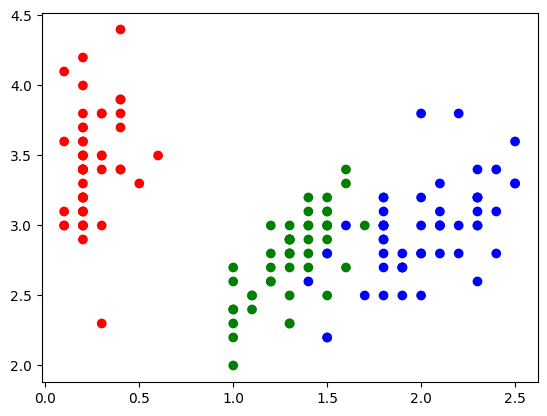

In [5]:
import numpy as np
import matplotlib.pyplot as plt

colormap = np.array(['Red', 'green', 'blue'])
plt.scatter(features[:,3], features[:,1], c = colormap[labels])

## Préprocessing - Normalisation des caractéristiques 

<center>
  <img src='./Graphics/Prepr.png' width=500 />
</center>

Lorsque vous recevez un Dataset, il est impératif de procéder à quelques retouches **avant** de commencer à faire du Machine Learning afin d'améliorer la stabilité numérique et la convergence d'un algorithme.
1. Il est fréquent qu’un Dataset contienne quelques **anomalies**, voire des erreurs, qu’il faut **supprimer** pour ne pas biaiser l’apprentissage de la machine (vous ne voudriez pas que la machine apprenne quelque chose de faux).
2. Il est aussi important de **normaliser** vos données, c’est-à-dire les mettre sur une même échelle pour rendre l’apprentissage de la machine plus rapide et aussi plus efficace.
3. Si vous avez des valeurs **manquantes**, il faut être capable de leur assigner une valeur défaut.
4. Si vous avez des features **catégoriales** (exemple : homme/femme) il faut les convertir en données numériques (homme=0, femme=1).
5. Egalement, il est très important de nettoyer le Dataset des features **redondantes** (qui ont une forte corrélation) pour faciliter l’apprentissage de la machine.
6. Finalement, un point qui peut faire toute la différence est la création de nouvelles features, ce qu’on appelle **feature engineering**. Exemple : Prenez un Dataset immobilier qui contient les features : $x_0$ = longueur jardin; $x_1$ = largeur jardin. Alors il est possible de créer $x_2 = x_0\times x_1_$ qui équivaut à la surface du
jardin.

Typiquement, sklearn et pandas disposent des fonctions nécessaires pour faire un bon data pre-processing.

Dans le présent problème, nous allons juste normaliser les features en appliquant une transformation simple pour les représenter sur la même échelle. A cet effet, nous compressons toutes les caractéristiques dans l'intervalle $[0,1]$. 

Nous pouvons utiliser `sklearn.preprocessing.MinMaxScaler` pour effectuer cette opération. Sans spécifier de paramètres, cette méthode fait exactement ce qui est demandé : elle fait correspondre les données à $[0,1]$.

In [7]:
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)

<div class="alert alert-info">
Voyons à quoi ressemblent nos données. Nous traçons les caractéristiques deux à deux pour voir s'il existe une corrélation observable entre elles. 
 </div>
 
 Pour cela, nous convertissons la base de données sklearn en dataframe Pandas. En effet, Un data frame est une structure bidimensionnelle. Cela signifie que les données sont alignées de façon tabulaire en colonnes et en lignes.

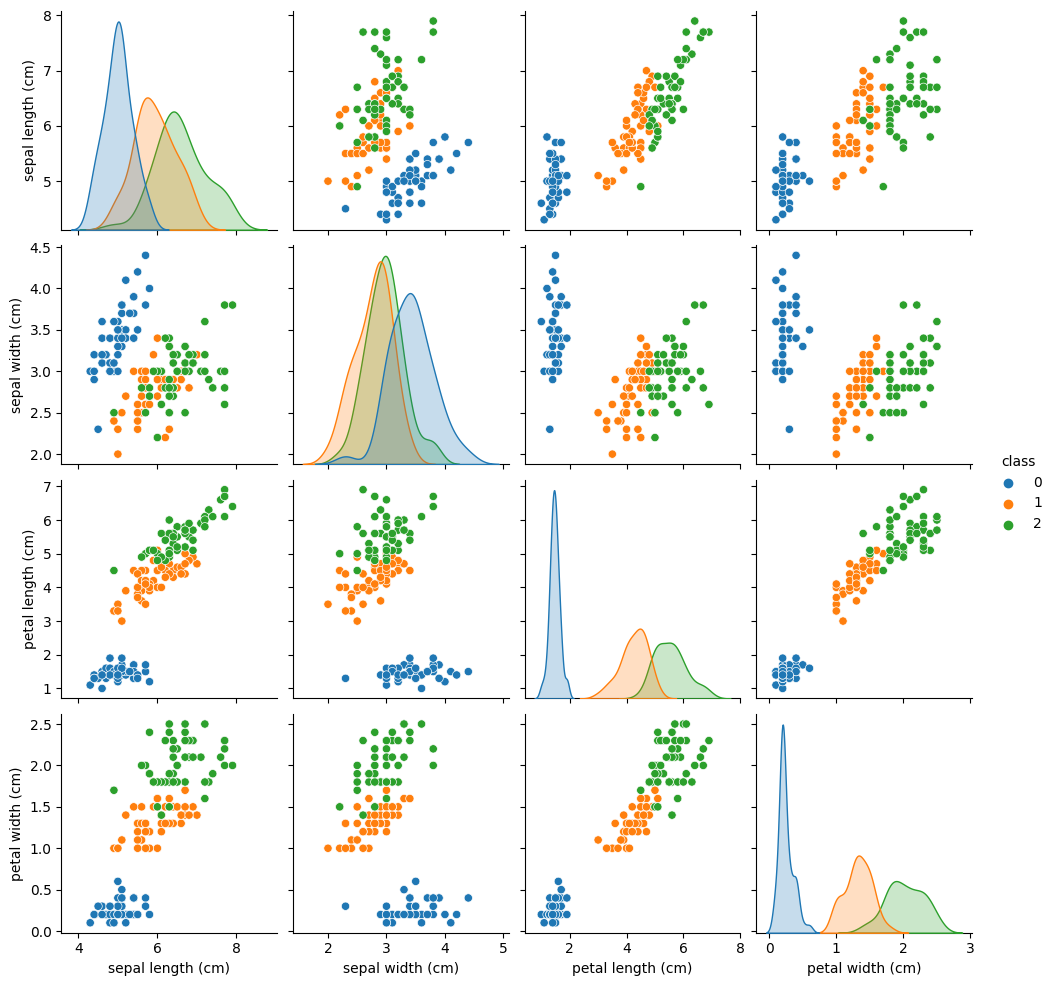

In [8]:
import pandas as pd #Nécessaire pour notre dataframe
import seaborn as sns #Nécessaire pour tracer nos features deux à deux
#afin de voir à quoi ressemble notre base de données

df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
#Conversion de la base de donnée sklearn en dataframe panda

df["class"] = pd.Series(iris_data.target) #

sns.pairplot(df, hue="class", palette="tab10")

## 2. Entrainement d'un modèle classique d'apprentissage automatique (Learning Algorithm)

Avant d'entraîner notre modèle, nous divisons la BD en deux parties (**splitting dataset**) : une BD d'entraînement et une BD de test. Nous utilisons la première pour entraîner le modèle et la seconde pour vérifier les performances de nos modèles sur des données inédites.

Comme d'habitude, nous demandons à scikit-learn de faire le travail.

In [9]:
from sklearn.model_selection import train_test_split

from qiskit.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

Maintenant, nous formons un classificateur à vecteur de support (Support Vector Classifier SVC) classique à partir de scikit-learn. Pour des soucis de simplicité, nous ne modifions aucun paramètre et nous nous appuyons sur les valeurs par défaut. Il est à noter que **Support Vector Machine** est un algorithme permettant de trouver la frontière de décision linéaire qui éloigne le plus les classes l’unes de l’autres. Il est facile de créer des modèles aux dimensions infinies avec cette méthode.

In [10]:
from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(train_features, train_labels)  #Afin de supprimer l'impression
#de la valeur de retour

<div class="alert alert-info">
 <strong>  Nous vérifions maintenant les performances de notre modèle classique.
      <strong> 
 </div>

In [11]:
train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.99
Classical SVC on the test dataset:     0.97


## 3. Entrainement d'un modèle d'apprentissage automatique quantique

<center>
  <img src='./Graphics/VQC.png' width=600 />
</center>

**NB:** Bien vouloir s'approprier du tutoriel `Qiskit Tutorial 2 - Circuits quantiques paramétrés` de votre cours pour mieux appréhender certaines notions de cette partie.


Comme exemple de modèle quantique, nous entraînons un classificateur quantique variationnel (***Variational Quantum Classifier, VQC***). Le VQC est le classificateur le plus simple disponible dans Qiskit Machine Learning et constitue un bon point de départ pour ceux qui sont nouveaux dans l'apprentissage automatique quantique.

Pour commencer, nous examinons ce qui compose la classe VQC. Deux de ses éléments centraux sont la **carte des caractéristiques (feature map)** et **l'ansatz** (`voir Qiskit Tutorial 2 - Circuits quantiques paramétrés`).

* Nos données sont classiques, c'est-à-dire qu'elles consistent en un ensemble de bits, et non de qubits. Nous avons besoin d'un moyen d'encoder les données sous forme de qubits. Ce processus est crucial si nous voulons obtenir un modèle quantique efficace. Nous appelons généralement ce mappage "encodage des données", "incorporation des données" ou "chargement des données", et c'est là le rôle du *feature map*.

* Une fois les données chargées, nous devons immédiatement appliquer un circuit quantique paramétré. Ce circuit est un analogue direct des couches des réseaux neuronaux classiques. Il dispose d'un ensemble de paramètres ou de poids réglables. Les poids sont optimisés de manière à minimiser une fonction objective. Cette fonction objective caractérise la distance entre les prédictions et les données étiquetées connues. Un circuit quantique paramétré est également appelé état d'essai paramétré, forme variationnelle ou *ansatz*. C'est ce dernier terme qui est le plus utilisé.


  Nous choisissons la carte de caractéristiques `ZZFeatureMap`. La ZZFeatureMap est l'une des cartes de caractéristiques standard de la bibliothèque de circuits Qiskit. Ici, `num_caractéristiques` est la dimension_caractéristique (**nombre de features de notre dataset = 4 selon le shape imprimé plus haut**), ce qui signifie que la carte de caractéristiques aura num_caractéristiques qubits (nombre de qubits, ici on adopte 4).

Nous décomposons la carte de caractéristiques en ses portes constitutives afin de vous donner une idée de la façon dont les cartes de caractéristiques peuvent se présenter


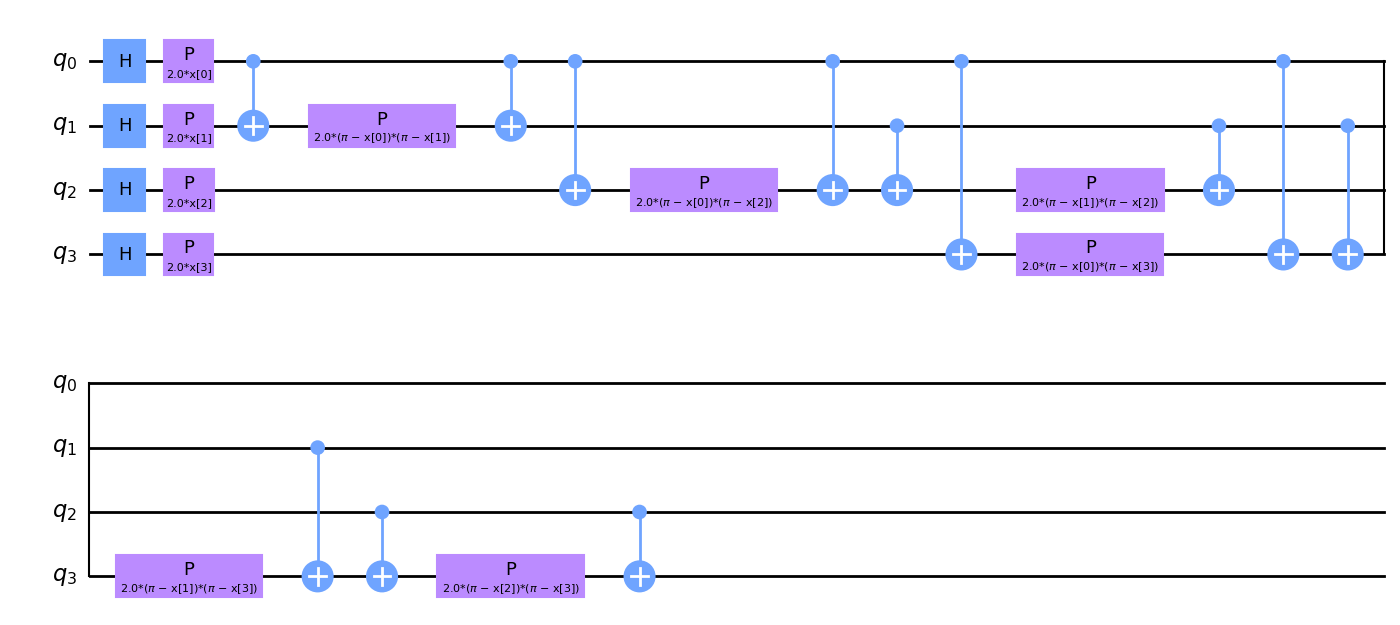

In [12]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20, scale=.6)

**Les paramètres $x[0], ..., x[3]$ représentent des espaces réservés pour nos features.**

* Nous créons et tracons maintenant notre ansatz. Faites attention à la structure répétitive du circuit de l'ansatz. Nous définissons le nombre de ces répétitions à l'aide du paramètre reps.

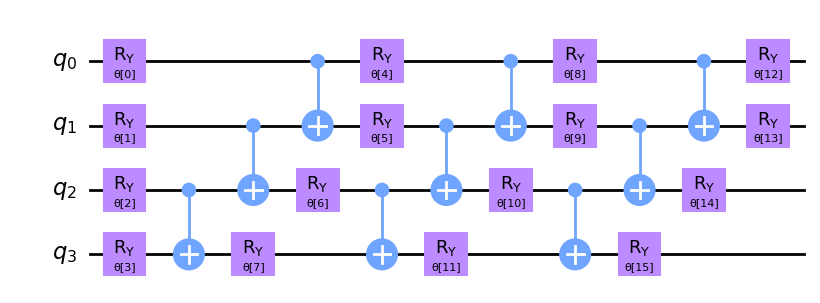

In [13]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

**Notre circuit a 16 paramètres nommés $\theta[0], ..., \theta[15]$. Il s'agit des poids entraînables du classificateur.**

* Nous choisissons ensuite un algorithme d'optimisation à utiliser dans le processus d'apprentissage. Pour accélérer le processus de formation, nous choisissons un optimiseur sans gradient.

In [14]:
from qiskit.algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

Dans l'étape suivante, nous définissons l'endroit où nous allons entraîner notre classificateur. Nous pouvons l'entraîner sur un simulateur ou sur un véritable ordinateur quantique. Ici, nous utiliserons un simulateur. Nous créons une instance de la `primitive Sampler`. Il s'agit de l'implémentation de référence qui est basée sur les vecteurs d'état. En utilisant les services d'exécution qiskit, vous pouvez créer un échantillonneur qui est soutenu par un ordinateur quantique.

In [15]:
from qiskit.primitives import Sampler

sampler = Sampler()

* Nous ajoutons une fonction de rappel appelée `callback_graph`. VQC appellera cette fonction pour chaque évaluation de la fonction objective avec deux paramètres : **les poids actuels et la valeur de la fonction objective à ces poids**. Notre fonction callback ajoutera la valeur de la fonction objective à un tableau afin que *nous puissions tracer l'itération en fonction de la valeur de la fonction objective*. Le callback mettra à jour le graphique à chaque itération. Notez que vous pouvez faire ce que vous voulez à l'intérieur d'une fonction callback, tant qu'elle a la signature à deux paramètres que nous avons mentionnée ci-dessus.

In [16]:
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

Nous sommes maintenant prêts à construire le classificateur et à l'adapter. Ainsi donc, nous faisons notre entrainement, qui prendra un certain temps, alors ***soyez patient.***

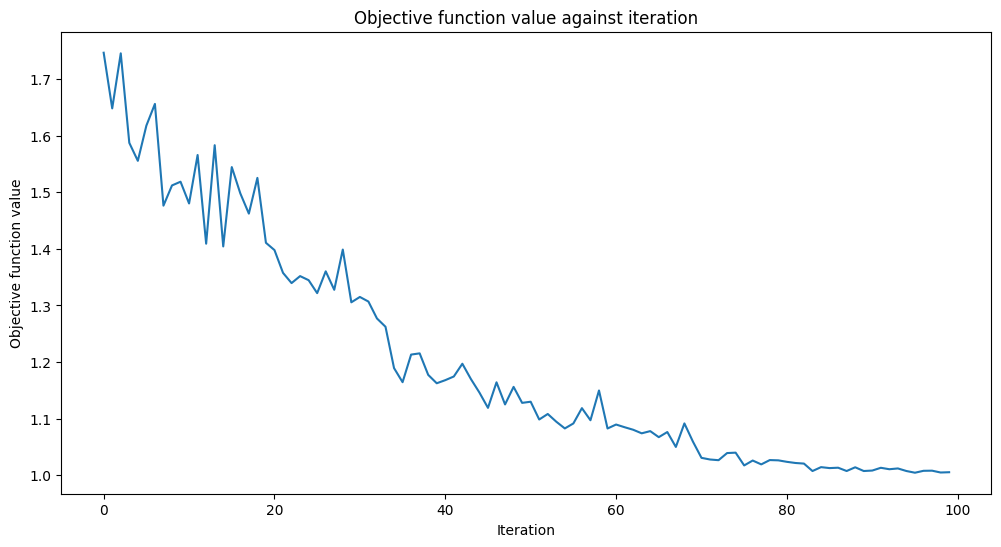

Training time: 132 seconds


In [17]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed1 = time.time() - start

print(f"Training time: {round(elapsed1)} seconds")


<div class="alert alert-warning">
  <strong>Voyons maintenant comment le modèle quantique se comporte sur l'ensemble des données réelles.</strong>
</div>

In [18]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.85
Quantum VQC on the test dataset:     0.87


<div class="alert alert-danger">
  <strong>  Comment améliorer la performance de notre modèle ? </strong>
</div>


* Les éléments clés sont la carte des caractéristiques (feature map) et l'ansatz dont on peut modifier les paramètres. Dans notre cas, nous modifions le paramètre reps qui spécifie le nombre de répétitions d'un modèle de porte que nous ajoutons au circuit. Des valeurs plus élevées entraînent plus d'opérations d'intrication et plus de paramètres. Ainsi, le modèle peut être plus flexible, mais le nombre plus élevé de paramètres ajoute également de la complexité, et l'apprentissage d'un tel modèle prend généralement plus de temps. En outre, nous pouvons finir par surajuster le modèle.

**Remarque:** Vous pouvez essayer d'autres optimiseurs. Qiskit en contient un certain nombre. 
    
* Une autre option consiste à échantillonner aléatoirement (ou de manière déterministe) le point initial et à ajuster le modèle plusieurs fois.

* Nous rappelons que dans notre exemple, nous avions le même nombre de qubits que le nombre de caractéristiques de l'ensemble de données, mais ce n'est pas toujours le cas.

## 4. Réduction du nombre de caractéristiques (features)

Dans cette partie, nous décidons de réduire le nombre de caractéristiques de notre ensemble de données et nous entraînons à nouveau nos modèles. Nous irons plus vite cette fois-ci, car les étapes sont les mêmes, à l'exception de la première, où nous appliquons une transformation *PCA (Principal Component Analysis)*.

Nous transformons nos **quatre** caractéristiques en **deux** caractéristiques seulement. Cette réduction de la dimensionnalité n'est utilisée qu'à des fins éducatives. Comme vous l'avez vu dans la section précédente, nous pouvons former un modèle quantique en utilisant les quatre caractéristiques de l'ensemble de données.

In [19]:
from sklearn.decomposition import PCA

features = PCA(n_components=2).fit_transform(features)

Nous divisons d'abord l'ensemble des données, ensuite nous appliquons un modèle classique.

In [20]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

svc.fit(train_features, train_labels)

train_score_c2 = svc.score(train_features, train_labels)
test_score_c2 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c2:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c2:.2f}")



Classical SVC on the training dataset: 0.97
Classical SVC on the test dataset:     0.90


Les résultats sont toujours bons mais légèrement moins bons que ceux de la version initiale. Voyons comment un modèle quantique les traite. Comme nous avons maintenant deux qubits, nous devons recréer la carte des caractéristiques et l'ansatz.

In [21]:
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

Nous réduisons également le nombre maximum d'itérations pour lesquelles nous exécutons le processus d'optimisation, car nous nous attendons à ce qu'il converge plus rapidement étant donné que nous avons maintenant moins de qubits.

In [22]:
optimizer = COBYLA(maxiter=40)

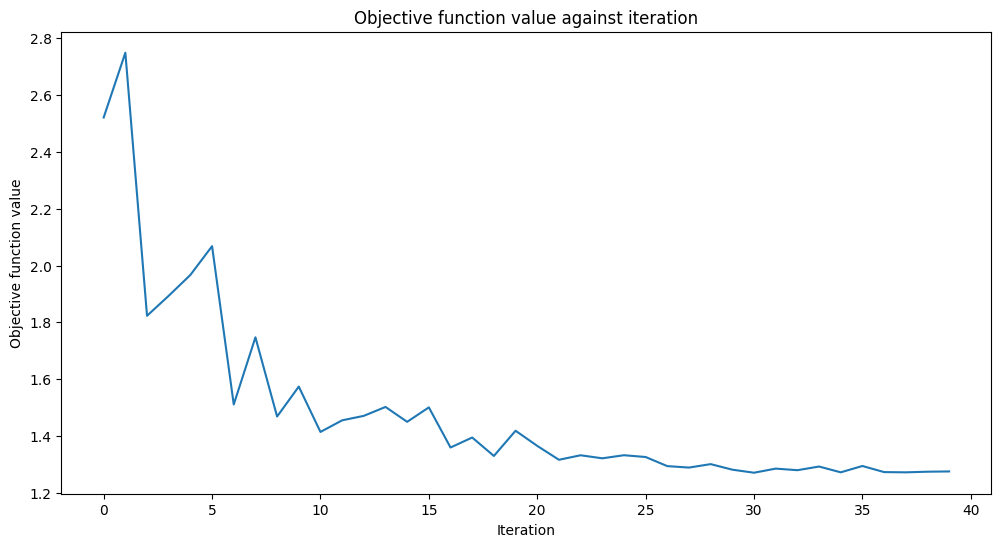

Training time: 29 seconds


In [23]:
#Nous construisons maintenant un classificateur quantique à partir
#des nouveaux paramètres et nous l'entraînons.
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# make the objective function plot look nicer.
plt.rcParams["figure.figsize"] = (12, 6)


start = time.time()
vqc.fit(train_features, train_labels)
elapsed2 = time.time() - start

print(f"Training time: {round(elapsed2)} seconds")

In [24]:
train_score_q2_ra = vqc.score(train_features, train_labels)
test_score_q2_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.58
Quantum VQC on the test dataset using RealAmplitudes:     0.63


La fonction objective est presque plate vers la fin, ce qui signifie qu'augmenter le nombre d'itérations ne servira à rien et que les performances du modèle resteront les mêmes. Voyons ce que nous pouvons faire avec un autre ansatz.

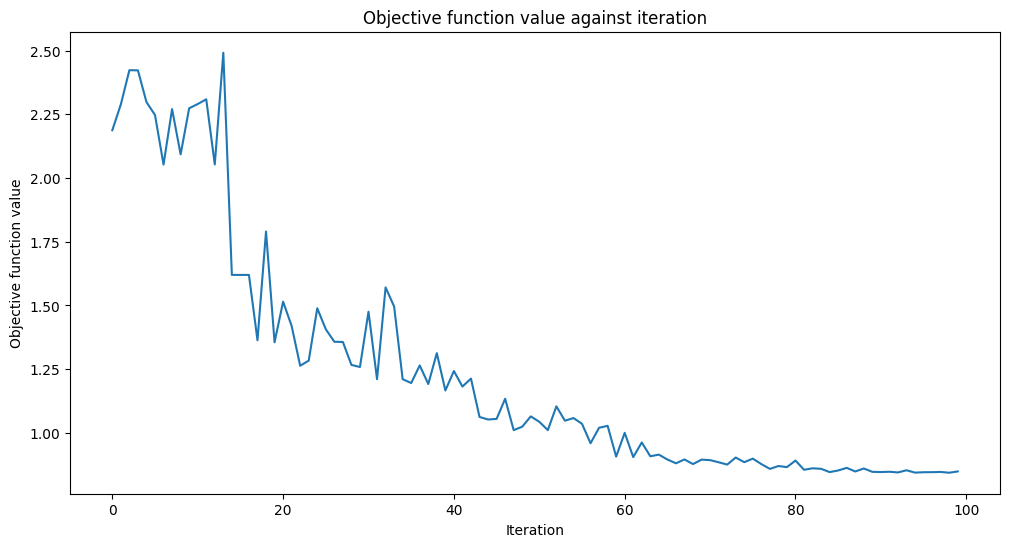

Training time: 93 seconds


In [25]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=100)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# Historique de la valeur objective claire
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed3 = time.time() - start

print(f"Training time: {round(elapsed3)} seconds")

In [26]:
train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.81
Quantum VQC on the test dataset using EfficientSU2:     0.83


<div class="alert alert-danger">
  <strong>  Les résultats sont meilleurs que dans la configuration précédente. Peut-être que si nous avions utilisé plus d'itérations, nous aurions pu faire encore mieux. </strong>
</div>

## Conclusion
Imprimons un tableau global avec nos résultats.

In [27]:
print(f"Model                           | Test Score | Train Score |Treaining time")
print(f"SVC, 4 features                 | {train_score_c4:10.2f} | {test_score_c4:10.2f} |")
print(f"VQC, 4 features, RealAmplitudes | {train_score_q4:10.2f} | {test_score_q4:10.2f} | {round(elapsed1)} seconds" )
print(f"----------------------------------------------------------")
print(f"SVC, 2 features                 | {train_score_c2:10.2f} | {test_score_c2:10.2f} | ")
print(f"VQC, 2 features, RealAmplitudes | {train_score_q2_ra:10.2f} | {test_score_q2_ra:10.2f} | {round(elapsed2)} seconds ")
print(f"VQC, 2 features, EfficientSU2   | {train_score_q2_eff:10.2f} | {test_score_q2_eff:10.2f} | {round(elapsed3)} seconds")

Model                           | Test Score | Train Score |Treaining time
SVC, 4 features                 |       0.99 |       0.97 |
VQC, 4 features, RealAmplitudes |       0.85 |       0.87 | 132 seconds
----------------------------------------------------------
SVC, 2 features                 |       0.97 |       0.90 | 
VQC, 2 features, RealAmplitudes |       0.58 |       0.63 | 29 seconds 
VQC, 2 features, EfficientSU2   |       0.81 |       0.83 | 93 seconds


Sans surprise, les modèles classiques sont plus performants que ceux quantiques.

Comme nous pouvons le voir, nous avons obtenu les meilleurs résultats en utilisant le SVC classique. Mais le modèle quantique formé sur quatre caractéristiques était également assez bon. Lorsque nous avons réduit le nombre de caractéristiques, les performances de tous les modèles ont baissé comme prévu. Par conséquent, si les ressources permettent d'entraîner un modèle sur un ensemble de données complet sans aucune réduction, vous devriez entraîner un tel modèle. Dans le cas contraire, il faut s'attendre à un compromis entre la taille de l'ensemble de données, le temps d'apprentissage et le score.

Une autre observation est que même un simple changement d'ansatz peut conduire à de meilleurs résultats. Le modèle à deux caractéristiques avec l'ansatz EfficientSU2 donne de meilleurs résultats que celui avec RealAmplitudes. Cela signifie que le choix des hyperparamètres joue le même rôle critique dans le QML que dans le ML classique.

In [28]:
import qiskit.tools.jupyter
%qiskit_version_table